## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
   
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.5, 0.75, 0.9]
redice_lr_patient = [5, 10, 15]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    

    #設定 reduce learning rate 的 callback function
 

    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                                  min_lr=1e-12, 
                                  monitor='val_loss', 
                                  patience=reduce_patient, 
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.50, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 8s 165us/step - loss: 1.3126 - acc: 0.5433 - val_loss: 1.5057 - val_acc: 0.4648
Epoch 12/25
50000/50000 [==============================] - 7s 144us/step - loss: 1.2887 - acc: 0.5543 - val_loss: 1.5051 - val_acc: 0.4644
Epoch 13/25
50000/50000 [==============================] - 7s 145us/step - loss: 1.2663 - acc: 0.5611 - val_loss: 1.4790 - val_acc: 0.4773
Epoch 14/25
50000/50000 [==============================] - 7s 144us/step - loss: 1.2467 - acc: 0.5689 - val_loss: 1.4669 - val_acc: 0.4796
Epoch 15/25
50000/50000 [==============================] - 7s 144us/step - loss: 1.2260 - acc: 0.5756 - val_loss: 1.4751 - val_acc: 0.4798
Epoch 16/25
50000/50000 [==============================] - 7s 145us/step - loss: 1.2057 - acc: 0.5829 - val_loss: 1.4669 - val_acc: 0.4830
Epoch 17/25
50000/50000 [==============================] - 7s 140us/step - loss: 1.1865 - acc: 0.5909 - val_loss: 1.4608 - val_acc: 0.4813
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 10s 197us/step - loss: 2.2466 - acc: 0.2578 - val_loss: 2.1088 - val_acc: 0.3036
Epoch 2/25
50000/50000 [==============================] - 8s 156us/step - loss: 1.7723 - acc: 0.3823 - val_loss: 1.9007 - val_acc: 0.3548
Epoch 3/25
50000/50000 [==============================] - 7s 138us/step - loss: 1.6467 - acc: 0.4232 - val_loss: 1.7180 - val_acc: 0.4032
Epoch 4/25
50000/50000 [==============================] - 7s 138us/step - loss: 1.5735 - acc: 0.4458 - val_loss: 1.6662 - val_acc: 0.4202
Epoch 5/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.5191 - acc: 0.4660 - val_loss: 1.6344 - val_acc: 0.4283
Epoch 6/25
50000/50000 [==============================] - 7s 138us/step - loss: 1.4748 - acc: 0.4821 - val_loss: 1.5945 - val_acc: 0.4417
Epoch 7/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.4395 - acc: 0.4954 - val_loss: 1.5728 -

Epoch 24/25
50000/50000 [==============================] - 8s 155us/step - loss: 1.0634 - acc: 0.6354 - val_loss: 1.4405 - val_acc: 0.4951
Epoch 25/25
50000/50000 [==============================] - 7s 140us/step - loss: 1.0459 - acc: 0.6422 - val_loss: 1.4401 - val_acc: 0.4960
Numbers of exp: 5, reduce_factor: 0.75, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
bat

50000/50000 [==============================] - 7s 137us/step - loss: 1.3104 - acc: 0.5413 - val_loss: 1.4940 - val_acc: 0.4737
Epoch 12/25
50000/50000 [==============================] - 7s 140us/step - loss: 1.2882 - acc: 0.5506 - val_loss: 1.4707 - val_acc: 0.4788
Epoch 13/25
50000/50000 [==============================] - 7s 146us/step - loss: 1.2652 - acc: 0.5599 - val_loss: 1.4730 - val_acc: 0.4813
Epoch 14/25
50000/50000 [==============================] - 8s 164us/step - loss: 1.2434 - acc: 0.5679 - val_loss: 1.4788 - val_acc: 0.4883
Epoch 15/25
50000/50000 [==============================] - 9s 174us/step - loss: 1.2231 - acc: 0.5760 - val_loss: 1.4602 - val_acc: 0.4856
Epoch 16/25
50000/50000 [==============================] - 8s 154us/step - loss: 1.2033 - acc: 0.5826 - val_loss: 1.4489 - val_acc: 0.4923
Epoch 17/25
50000/50000 [==============================] - 7s 149us/step - loss: 1.1834 - acc: 0.5900 - val_loss: 1.4455 - val_acc: 0.4894
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 11s 210us/step - loss: 2.2721 - acc: 0.2539 - val_loss: 2.2388 - val_acc: 0.2855
Epoch 2/25
50000/50000 [==============================] - 7s 142us/step - loss: 1.7752 - acc: 0.3824 - val_loss: 1.8906 - val_acc: 0.3632
Epoch 3/25
50000/50000 [==============================] - 7s 140us/step - loss: 1.6508 - acc: 0.4212 - val_loss: 1.7029 - val_acc: 0.4062
Epoch 4/25
50000/50000 [==============================] - 7s 140us/step - loss: 1.5823 - acc: 0.4452 - val_loss: 1.6447 - val_acc: 0.4271
Epoch 5/25
50000/50000 [==============================] - 7s 145us/step - loss: 1.5314 - acc: 0.4649 - val_loss: 1.6091 - val_acc: 0.4382
Epoch 6/25
50000/50000 [==============================] - 7s 142us/step - loss: 1.4915 - acc: 0.4787 - val_loss: 1.5833 - val_acc: 0.4474
Epoch 7/25
50000/50000 [==============================] - 7s 142us/step - loss: 1.4570 - acc: 0.4934 - val_loss: 1.5641 -

Epoch 23/25
50000/50000 [==============================] - 8s 154us/step - loss: 0.4119 - acc: 0.8816 - val_loss: 1.6246 - val_acc: 0.5090

Epoch 00023: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 24/25
50000/50000 [==============================] - 7s 149us/step - loss: 0.3743 - acc: 0.8998 - val_loss: 1.5649 - val_acc: 0.5291
Epoch 25/25
50000/50000 [==============================] - 7s 147us/step - loss: 0.3597 - acc: 0.9081 - val_loss: 1.5834 - val_acc: 0.5254
Numbers of exp: 10, reduce_factor: 0.50, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_31 (Batc (None, 256)      

Epoch 10/25
50000/50000 [==============================] - 7s 138us/step - loss: 1.0639 - acc: 0.6323 - val_loss: 1.4449 - val_acc: 0.4938
Epoch 11/25
50000/50000 [==============================] - 7s 139us/step - loss: 1.0316 - acc: 0.6454 - val_loss: 1.4394 - val_acc: 0.5002
Epoch 12/25
50000/50000 [==============================] - 7s 137us/step - loss: 0.9999 - acc: 0.6569 - val_loss: 1.4749 - val_acc: 0.4815
Epoch 13/25
50000/50000 [==============================] - 7s 137us/step - loss: 0.9723 - acc: 0.6666 - val_loss: 1.4289 - val_acc: 0.4980
Epoch 14/25
50000/50000 [==============================] - 7s 137us/step - loss: 0.9437 - acc: 0.6774 - val_loss: 1.4383 - val_acc: 0.5051
Epoch 15/25
50000/50000 [==============================] - 7s 137us/step - loss: 0.9148 - acc: 0.6912 - val_loss: 1.4721 - val_acc: 0.4888
Epoch 16/25
50000/50000 [==============================] - 7s 141us/step - loss: 0.8904 - acc: 0.6988 - val_loss: 1.4617 - val_acc: 0.4937
Epoch 17/25
50000/50000 [==

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 13s 268us/step - loss: 1.9369 - acc: 0.3405 - val_loss: 1.8921 - val_acc: 0.3563
Epoch 2/25
50000/50000 [==============================] - 7s 149us/step - loss: 1.5770 - acc: 0.4447 - val_loss: 1.6640 - val_acc: 0.4182
Epoch 3/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.4821 - acc: 0.4798 - val_loss: 1.6008 - val_acc: 0.4372
Epoch 4/25
50000/50000 [==============================] - 8s 155us/step - loss: 1.4177 - acc: 0.5045 - val_loss: 1.5871 - val_acc: 0.4409
Epoch 5/25
50000/50000 [==============================] - 8s 151us/step - loss: 1.3690 - acc: 0.5216 - val_loss: 1.5607 - val_acc: 0.4545
Epoch 6/25
50000/50000 [==============================] - 8s 153us/step - loss: 1.3267 - acc: 0.5356 - val_loss: 1.5173 - val_acc: 0.4704
Epoch 7/25
50000/50000 [==============================] - 7s 149us/step - loss: 1.2928 - acc: 0.5488 - val_loss: 1.5117 -

Epoch 24/25
50000/50000 [==============================] - 9s 176us/step - loss: 0.9574 - acc: 0.6780 - val_loss: 1.4267 - val_acc: 0.5018
Epoch 25/25
50000/50000 [==============================] - 9s 178us/step - loss: 0.9430 - acc: 0.6857 - val_loss: 1.4225 - val_acc: 0.5050
Numbers of exp: 15, reduce_factor: 0.90, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
bat

50000/50000 [==============================] - 8s 160us/step - loss: 1.1887 - acc: 0.5894 - val_loss: 1.4650 - val_acc: 0.4819
Epoch 12/25
50000/50000 [==============================] - 8s 155us/step - loss: 1.1669 - acc: 0.5978 - val_loss: 1.4295 - val_acc: 0.4903
Epoch 13/25
50000/50000 [==============================] - 7s 149us/step - loss: 1.1455 - acc: 0.6069 - val_loss: 1.4442 - val_acc: 0.4847
Epoch 14/25
50000/50000 [==============================] - 7s 149us/step - loss: 1.1259 - acc: 0.6142 - val_loss: 1.4341 - val_acc: 0.4940
Epoch 15/25
50000/50000 [==============================] - 7s 149us/step - loss: 1.1079 - acc: 0.6211 - val_loss: 1.4245 - val_acc: 0.4962
Epoch 16/25
50000/50000 [==============================] - 7s 150us/step - loss: 1.0906 - acc: 0.6260 - val_loss: 1.4235 - val_acc: 0.4994
Epoch 17/25
50000/50000 [==============================] - 8s 151us/step - loss: 1.0733 - acc: 0.6338 - val_loss: 1.4190 - val_acc: 0.4991
Epoch 18/25
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 13s 265us/step - loss: 1.8389 - acc: 0.3615 - val_loss: 2.5205 - val_acc: 0.2701
Epoch 2/25
50000/50000 [==============================] - 8s 158us/step - loss: 1.5331 - acc: 0.4578 - val_loss: 2.4744 - val_acc: 0.2608
Epoch 3/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.4177 - acc: 0.4986 - val_loss: 1.9936 - val_acc: 0.3499
Epoch 4/25
50000/50000 [==============================] - 8s 158us/step - loss: 1.3394 - acc: 0.5276 - val_loss: 2.1548 - val_acc: 0.3452
Epoch 5/25
50000/50000 [==============================] - 8s 156us/step - loss: 1.2726 - acc: 0.5514 - val_loss: 1.9623 - val_acc: 0.3512
Epoch 6/25
50000/50000 [==============================] - 8s 153us/step - loss: 1.2176 - acc: 0.5724 - val_loss: 1.6326 - val_acc: 0.4329
Epoch 7/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.1683 - acc: 0.5886 - val_loss: 2.0193 -

50000/50000 [==============================] - 7s 149us/step - loss: 0.9055 - acc: 0.6950 - val_loss: 1.5216 - val_acc: 0.4804
Epoch 23/25
50000/50000 [==============================] - 7s 147us/step - loss: 0.8877 - acc: 0.7022 - val_loss: 1.5832 - val_acc: 0.4740
Epoch 24/25
50000/50000 [==============================] - 7s 146us/step - loss: 0.8681 - acc: 0.7077 - val_loss: 1.4886 - val_acc: 0.4920
Epoch 25/25
50000/50000 [==============================] - 8s 152us/step - loss: 0.8486 - acc: 0.7175 - val_loss: 1.5610 - val_acc: 0.4830

Epoch 00025: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Numbers of exp: 20, reduce_factor: 0.50, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)            

Epoch 9/25
50000/50000 [==============================] - 8s 152us/step - loss: 1.3412 - acc: 0.5300 - val_loss: 1.5514 - val_acc: 0.4564
Epoch 10/25
50000/50000 [==============================] - 8s 151us/step - loss: 1.3104 - acc: 0.5444 - val_loss: 1.5593 - val_acc: 0.4531
Epoch 11/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.2821 - acc: 0.5529 - val_loss: 1.5487 - val_acc: 0.4614
Epoch 12/25
50000/50000 [==============================] - 7s 149us/step - loss: 1.2553 - acc: 0.5650 - val_loss: 1.5256 - val_acc: 0.4664
Epoch 13/25
50000/50000 [==============================] - 8s 166us/step - loss: 1.2303 - acc: 0.5719 - val_loss: 1.5027 - val_acc: 0.4786
Epoch 14/25
50000/50000 [==============================] - 8s 160us/step - loss: 1.2088 - acc: 0.5808 - val_loss: 1.4974 - val_acc: 0.4766
Epoch 15/25
50000/50000 [==============================] - 8s 158us/step - loss: 1.1864 - acc: 0.5900 - val_loss: 1.5236 - val_acc: 0.4683
Epoch 16/25
50000/50000 [===

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 15s 309us/step - loss: 2.1098 - acc: 0.2924 - val_loss: 1.9959 - val_acc: 0.3298
Epoch 2/25
50000/50000 [==============================] - 8s 156us/step - loss: 1.7622 - acc: 0.3914 - val_loss: 1.8452 - val_acc: 0.3677
Epoch 3/25
50000/50000 [==============================] - 8s 159us/step - loss: 1.6399 - acc: 0.4303 - val_loss: 1.7230 - val_acc: 0.4015
Epoch 4/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.5611 - acc: 0.4569 - val_loss: 1.6701 - val_acc: 0.4220
Epoch 5/25
50000/50000 [==============================] - 8s 150us/step - loss: 1.5028 - acc: 0.4749 - val_loss: 1.6285 - val_acc: 0.4263
Epoch 6/25
50000/50000 [==============================] - 8s 152us/step - loss: 1.4514 - acc: 0.4951 - val_loss: 1.5895 - val_acc: 0.4449
Epoch 7/25
50000/50000 [==============================] - 8s 161us/step - loss: 1.4101 - acc: 0.5062 - val_loss: 1.5460 -

Epoch 24/25
50000/50000 [==============================] - 8s 158us/step - loss: 1.0150 - acc: 0.6563 - val_loss: 1.4601 - val_acc: 0.4876
Epoch 25/25
50000/50000 [==============================] - 8s 155us/step - loss: 1.0007 - acc: 0.6621 - val_loss: 1.4752 - val_acc: 0.4880
Numbers of exp: 25, reduce_factor: 0.90, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_76 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
ba

50000/50000 [==============================] - 8s 158us/step - loss: 1.2943 - acc: 0.5483 - val_loss: 1.5173 - val_acc: 0.4693
Epoch 12/25
50000/50000 [==============================] - 8s 169us/step - loss: 1.2676 - acc: 0.5573 - val_loss: 1.5217 - val_acc: 0.4653
Epoch 13/25
50000/50000 [==============================] - 8s 155us/step - loss: 1.2426 - acc: 0.5672 - val_loss: 1.5732 - val_acc: 0.4521
Epoch 14/25
50000/50000 [==============================] - 8s 156us/step - loss: 1.2199 - acc: 0.5757 - val_loss: 1.5094 - val_acc: 0.4710
Epoch 15/25
50000/50000 [==============================] - 8s 170us/step - loss: 1.1961 - acc: 0.5851 - val_loss: 1.4880 - val_acc: 0.4786
Epoch 16/25
50000/50000 [==============================] - 8s 163us/step - loss: 1.1761 - acc: 0.5918 - val_loss: 1.4862 - val_acc: 0.4750
Epoch 17/25
50000/50000 [==============================] - 8s 167us/step - loss: 1.1565 - acc: 0.6005 - val_loss: 1.5126 - val_acc: 0.4686
Epoch 18/25
50000/50000 [==============

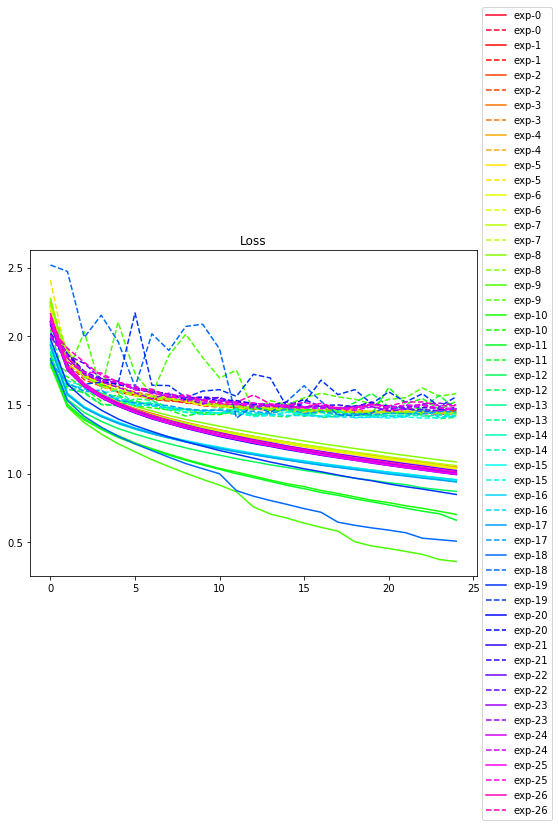

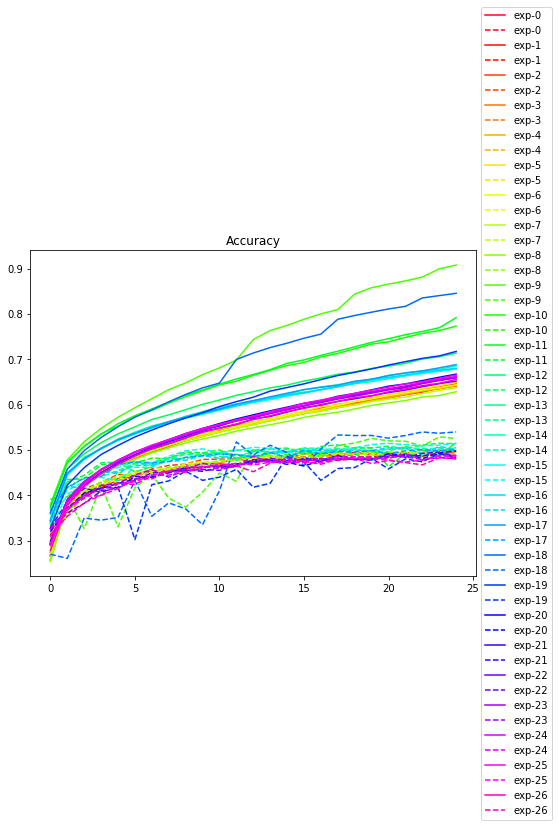

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()